In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# Data paths

In [2]:
dataPath = "MNIST_Autoencoder_CollectedData_FINAL"
sqPath = "%s/030917_HidingSquares" %dataPath

# Load autoencoder and affine mses

In [3]:
# autoencoder
squareIdxs_autoencoder = np.arange(4, 30, 2)
print squareIdxs_autoencoder

data_test_costs_squares = np.load('%s/data_test_costs_square.npy' %sqPath)
data_train_costs_squares = np.load('%s/data_train_costs_square.npy' %sqPath)
data_mses_testSplits_squares = np.load('%s/data_mses_testSplits_square.npy' %sqPath)

splitMeans_squares = np.zeros(13)
splitStddev_squares = np.zeros(13)
for i in range(13):
    splitMeans_squares[i] = np.mean(data_mses_testSplits_squares[i])
    splitStddev_squares[i] = np.std(data_mses_testSplits_squares[i])

[ 4  6  8 10 12 14 16 18 20 22 24 26 28]


In [4]:
# from MSE_columns_square_sizes.ipynb
# MMSE estimator
squareIdxs_affine = np.arange(2,30,2)
print squareIdxs_affine

train_mmse_removecenter = np.load('%s/mmse_hideSquares_train.npy' %sqPath)
splitTest_mmse_removecenter = np.load('%s/mmse_hideSquares_testSplits.npy' %sqPath)

test_mmse_means_removecenter = np.zeros(14)
test_mmse_stddevs_removecenter = np.zeros(14)
for i in range(14):
    test_mmse_means_removecenter[i] = np.mean(splitTest_mmse_removecenter[i])
    test_mmse_stddevs_removecenter[i] = np.std(splitTest_mmse_removecenter[i])

# avg training image
train_mmse_avgImage_removecenter = np.load('%s/mmse_avgImage_hideSquares_train.npy' %sqPath)
splitTest_mmse_avgImage_removecenter = np.load('%s/mmse_avgImage_hideSquares_testSplits.npy' %sqPath)

test_mmse_avgImage_means_removecenter = np.zeros(14)
test_mmse_avgImage_stddevs_removecenter = np.zeros(14)
for i in range(14):
    test_mmse_avgImage_means_removecenter[i] = np.mean(splitTest_mmse_avgImage_removecenter[i])
    test_mmse_avgImage_stddevs_removecenter[i] = np.std(splitTest_mmse_avgImage_removecenter[i])

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28]


# Hiding 8 x 8 Squares

In [5]:
squareSide = 8
idx_affine = np.where(squareIdxs_affine == squareSide)[0][0]
idx_ae = np.where(squareIdxs_autoencoder == squareSide)[0][0]

print 'Affine Idx: %d' %idx_affine

print train_mmse_removecenter[idx_affine]
print test_mmse_means_removecenter[idx_affine]
print test_mmse_stddevs_removecenter[idx_affine]

print 'Autoencoder Idx: %d' %idx_ae

print data_train_costs_squares[idx_ae]
print splitMeans_squares[idx_ae]
print splitStddev_squares[idx_ae]

Affine Idx: 3
0.0849664343108
0.0861817445058
0.0022701735561
Autoencoder Idx: 2
0.0391673982143
0.0437931489901
0.00190685130422


In [6]:
gan_8_test = np.load('mnist_gan/L2_loss_bs100_%d_mnist_test.npy' %squareSide).T
gan_8_train = np.load('mnist_gan/L2_loss_bs100_%d_mnist_train.npy' %squareSide).T

gan_8_test_batchMeans = np.zeros(10)
for i in range(10):
    gan_8_test_batchMeans[i] = np.mean(gan_8_test[i*10:(i+1)*10])

gan_8_test_mean = np.mean(gan_8_test_batchMeans)
gan_8_test_stddev = np.std(gan_8_test_batchMeans)
gan_8_train_mean = np.mean(gan_8_train)

print gan_8_train_mean
print gan_8_test_mean
print gan_8_test_stddev

0.109762802828
0.120312502235
0.0128157411302


In [7]:
af_8_train = train_mmse_removecenter[idx_affine]
af_8_test = test_mmse_means_removecenter[idx_affine]
af_8_test_dev = test_mmse_stddevs_removecenter[idx_affine]

ae_8_train = data_train_costs_squares[idx_ae]
ae_8_test = splitMeans_squares[idx_ae]
ae_8_test_dev = splitStddev_squares[idx_ae]

gan_8_train = gan_8_train_mean
gan_8_test = gan_8_test_mean 
gan_8_test_dev = gan_8_test_stddev

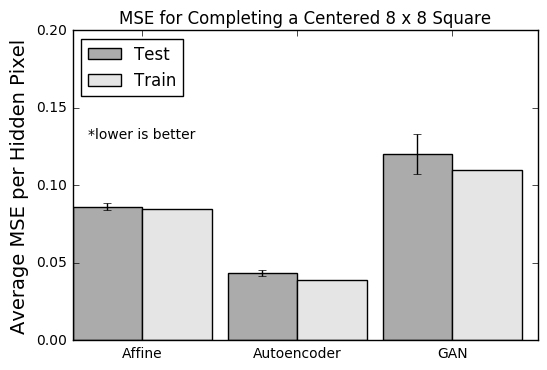

In [9]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.45       # the width of the bars

fig, ax = plt.subplots()

test_means = (af_8_test, ae_8_test, gan_8_test)
test_stddev = (af_8_test_dev, ae_8_test_dev, gan_8_test_dev)  
# rects1 = ax.bar(ind, test_means, width, color='#F19545', yerr=test_stddev)
rects1 = ax.bar(ind, test_means, width, color='#ababab', yerr=test_stddev, ecolor='black')

train_means = (af_8_train, ae_8_train, gan_8_train)
# rects2 = ax.bar(ind + width, train_means, width, color='#F8D3B6')
rects2 = ax.bar(ind + width, train_means, width, color='#e5e5e5')

# add some text for labels, title and axes ticks
plt.ylabel("Average MSE per Hidden Pixel", fontsize=14)
ax.set_title('MSE for Completing a Centered 8 x 8 Square')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Affine', 'Autoencoder', 'GAN'))
ax.legend((rects1[0], rects2[0]), ('Test', 'Train'), loc='upper left')

plt.ylim([0,0.2])
ax.text(0.1, 0.13, '*lower is better', fontsize=10)

plt.savefig('Fig_Gan_8x8.png', dpi=400)
plt.show()


# Hiding 10 x 10 Squares

In [15]:
squareSide = 10
idx_affine = np.where(squareIdxs_affine == squareSide)[0][0]
idx_ae = np.where(squareIdxs_autoencoder == squareSide)[0][0]

print 'Affine Idx: %d' %idx_affine

print train_mmse_removecenter[idx_affine]
print test_mmse_means_removecenter[idx_affine]
print test_mmse_stddevs_removecenter[idx_affine]

print 'Autoencoder Idx: %d' %idx_ae

print data_train_costs_squares[idx_ae]
print splitMeans_squares[idx_ae]
print splitStddev_squares[idx_ae]

Affine Idx: 4
0.0922883850222
0.0943543580799
0.00175264311747
Autoencoder Idx: 3
0.0565236866474
0.0588182797766
0.00155647860254


In [16]:
gan_10_test = np.load('mnist_gan/L2_loss_bs100_%d_mnist_test.npy' %squareSide).T
#gan_10_train = np.load('mnist_gan/L2_loss_bs100_%d_mnist_train.npy' %squareSide).T

gan_10_test_batchMeans = np.zeros(10)
for i in range(10):
    gan_10_test_batchMeans[i] = np.mean(gan_10_test[i*10:(i+1)*10])

gan_10_test_mean = np.mean(gan_10_test_batchMeans)
gan_10_test_stddev = np.std(gan_10_test_batchMeans)
gan_10_train_mean = gan_10_test_mean #np.mean(gan_10_train)

print gan_10_train_mean
print gan_10_test_mean
print gan_10_test_stddev

0.149705007076
0.149705007076
0.00808212849796


In [17]:
af_10_train = train_mmse_removecenter[idx_affine]
af_10_test = test_mmse_means_removecenter[idx_affine]
af_10_test_dev = test_mmse_stddevs_removecenter[idx_affine]

ae_10_train = data_train_costs_squares[idx_ae]
ae_10_test = splitMeans_squares[idx_ae]
ae_10_test_dev = splitStddev_squares[idx_ae]

gan_10_train = gan_10_train_mean
gan_10_test = gan_10_test_mean 
gan_10_test_dev = gan_10_test_stddev

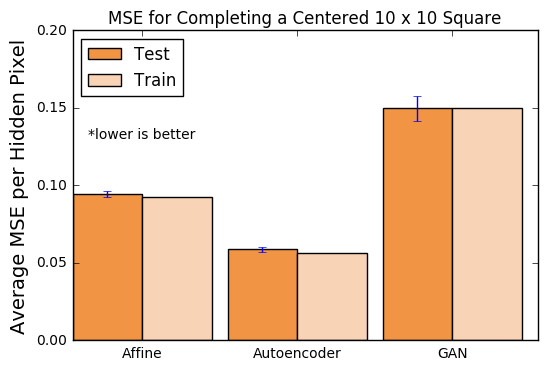

In [21]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.45       # the width of the bars

fig, ax = plt.subplots()

test_means = (af_10_test, ae_10_test, gan_10_test)
test_stddev = (af_10_test_dev, ae_10_test_dev, gan_10_test_dev)  
rects1 = ax.bar(ind, test_means, width, color='#F19545', yerr=test_stddev)

train_means = (af_10_train, ae_10_train, gan_10_train)
rects2 = ax.bar(ind + width, train_means, width, color='#F8D3B6')

# add some text for labels, title and axes ticks
plt.ylabel("Average MSE per Hidden Pixel", fontsize=14)
ax.set_title('MSE for Completing a Centered 10 x 10 Square')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Affine', 'Autoencoder', 'GAN'))
ax.legend((rects1[0], rects2[0]), ('Test', 'Train'), loc='upper left')

plt.ylim([0,0.20])
ax.text(0.1, 0.13, '*lower is better', fontsize=10)

plt.savefig('Fig_Gan_10x10.png')
plt.show()


# Hiding 12 x 12 Square

In [10]:
squareSide = 12
idx_affine = np.where(squareIdxs_affine == squareSide)[0][0]
idx_ae = np.where(squareIdxs_autoencoder == squareSide)[0][0]

print 'Affine Idx: %d' %idx_affine

print train_mmse_removecenter[idx_affine]
print test_mmse_means_removecenter[idx_affine]
print test_mmse_stddevs_removecenter[idx_affine]

print 'Autoencoder Idx: %d' %idx_ae

print data_train_costs_squares[idx_ae]
print splitMeans_squares[idx_ae]
print splitStddev_squares[idx_ae]

Affine Idx: 5
0.098851481664
0.101167933309
0.00144948723413
Autoencoder Idx: 4
0.0600746385753
0.0633280083621
0.00151789865422


In [11]:
gan_12_test = np.load('mnist_gan/L2_loss_bs100_%d_mnist_test.npy' %squareSide).T
#gan_12_train = np.load('mnist_gan/L2_loss_bs100_%d_mnist_train.npy' %squareSide).T

gan_12_test_batchMeans = np.zeros(10)
for i in range(10):
    gan_12_test_batchMeans[i] = np.mean(gan_12_test[i*10:(i+1)*10])

gan_12_test_mean = np.mean(gan_12_test_batchMeans)
gan_12_test_stddev = np.std(gan_12_test_batchMeans)
gan_12_train_mean = gan_12_test_mean #np.mean(gan_12_train)

print gan_12_train_mean
print gan_12_test_mean
print gan_12_test_stddev

0.174008446336
0.174008446336
0.00434218291995


In [12]:
af_12_train = train_mmse_removecenter[idx_affine]
af_12_test = test_mmse_means_removecenter[idx_affine]
af_12_test_dev = test_mmse_stddevs_removecenter[idx_affine]

ae_12_train = data_train_costs_squares[idx_ae]
ae_12_test = splitMeans_squares[idx_ae]
ae_12_test_dev = splitStddev_squares[idx_ae]

gan_12_train = gan_12_train_mean
gan_12_test = gan_12_test_mean 
gan_12_test_dev = gan_12_test_stddev

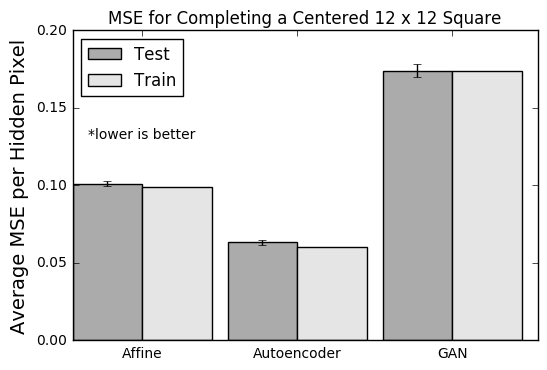

In [15]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.45       # the width of the bars

fig, ax = plt.subplots()

test_means = (af_12_test, ae_12_test, gan_12_test)
test_stddev = (af_12_test_dev, ae_12_test_dev, gan_12_test_dev)  
# rects1 = ax.bar(ind, test_means, width, color='#F19545', yerr=test_stddev)
rects1 = ax.bar(ind, test_means, width, color='#ababab', yerr=test_stddev, ecolor='black')

train_means = (af_12_train, ae_12_train, gan_12_train)
# rects2 = ax.bar(ind + width, train_means, width, color='#F8D3B6')
rects2 = ax.bar(ind + width, train_means, width, color='#e5e5e5')

# add some text for labels, title and axes ticks
plt.ylabel("Average MSE per Hidden Pixel", fontsize=14)
ax.set_title('MSE for Completing a Centered 12 x 12 Square')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Affine', 'Autoencoder', 'GAN'))
ax.legend((rects1[0], rects2[0]), ('Test', 'Train'), loc='upper left')

plt.ylim([0,0.20])
ax.text(0.1, 0.13, '*lower is better', fontsize=10)

plt.savefig('Fig_Gan_12x12.png', dpi=400)
plt.show()
